<a href="https://colab.research.google.com/github/gangakailas/DeepLearning/blob/main/GAN%26optimizers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# Load and normalize MNIST dataset
(x_train, y_train), (_, _) = mnist.load_data()
x_train = x_train[..., None] / 255.0  # shape: (60000, 28, 28, 1)

# Model builder
def build_model(optimizer):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define training settings
training_configs = {
    # 'GD (batch)': {'optimizer': tf.keras.optimizers.SGD(), 'batch_size': x_train.shape[0]},  # Removed: Full batch causes OOM error
    'SGD (stochastic)': {'optimizer': tf.keras.optimizers.SGD(), 'batch_size': 1},           # Batch size = 1
    'Mini-batch': {'optimizer': tf.keras.optimizers.SGD(), 'batch_size': 128},              # Typical mini-batch
    'Adam': {'optimizer': tf.keras.optimizers.Adam(), 'batch_size': 128},
    'RMSprop': {'optimizer': tf.keras.optimizers.RMSprop(), 'batch_size': 128},
    'Adagrad': {'optimizer': tf.keras.optimizers.Adagrad(), 'batch_size': 128}
}

# Store training accuracy histories
histories = {}

# Train each configuration
for name, config in training_configs.items():
    print(f"\nTraining using: {name}")
    model = build_model(config['optimizer'])
    history = model.fit(x_train, y_train, epochs=5, batch_size=config['batch_size'], verbose=1)
    histories[name] = history.history['accuracy']

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

Training using: SGD (stochastic)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 138s 2ms/step - accuracy: 0.9084 - loss: 0.2979
Epoch 2/5
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 138s 2ms/step - accuracy: 0.9823 - loss: 0.0550
Epoch 3/5
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 142s 2ms/step - accuracy: 0.9898 - loss: 0.0327
Epoch 4/5
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 142s 2ms/step - accuracy: 0.9937 - loss: 0.0198
Epoch 5/5
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 142s 2ms/step - accuracy: 0.9957 - loss: 0.0140

Training using: Mini-batch
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5707 - loss: 1.5183
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8941 - loss: 0.3713
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9090 - loss: 0.3100
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9177 - loss: 0.2810
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9250 - loss: 0.2570

Training using: Adam
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8613 

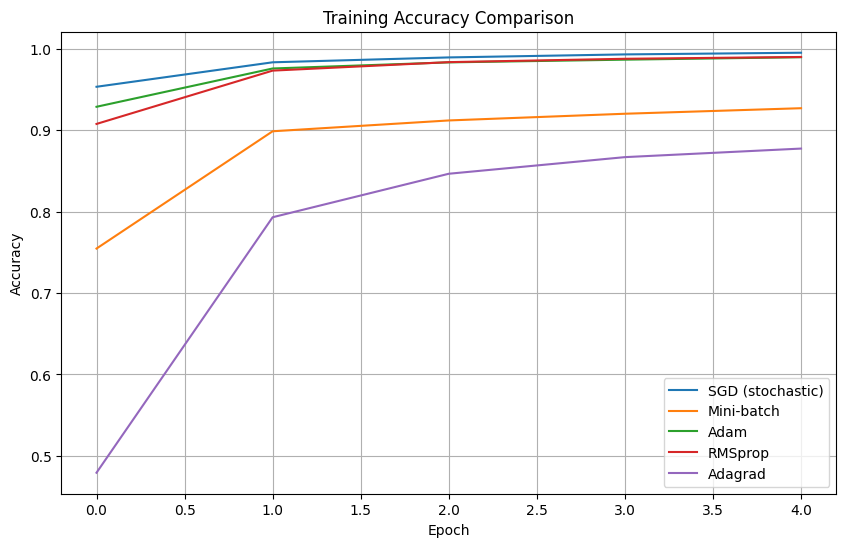

In [2]:
# Plot training accuracy for all configurations
plt.figure(figsize=(10, 6))
for name, acc in histories.items():
    plt.plot(acc, label=name)
plt.title("Training Accuracy Comparison")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [3]:
!pip install torch
!pip install torchvision

Epoch [1/50]  D Loss: 1.0317  G Loss: 1.1196


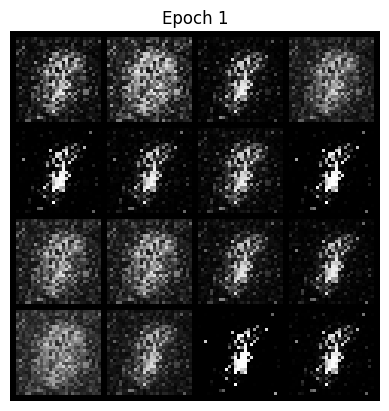

Epoch [2/50]  D Loss: 0.7763  G Loss: 1.4400


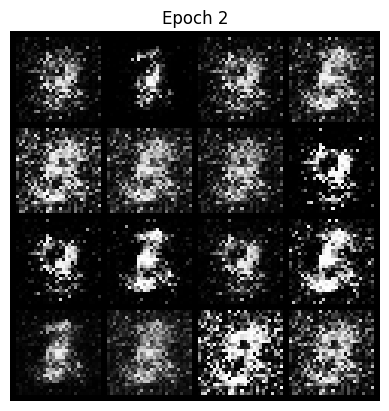

Epoch [3/50]  D Loss: 0.9872  G Loss: 1.4335


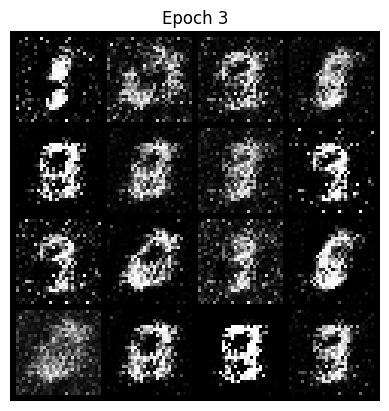

Epoch [4/50]  D Loss: 0.7462  G Loss: 2.7360


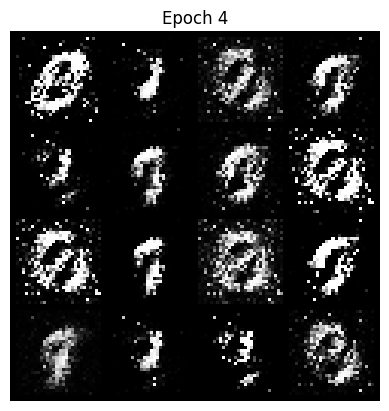

Epoch [5/50]  D Loss: 0.7011  G Loss: 1.7056


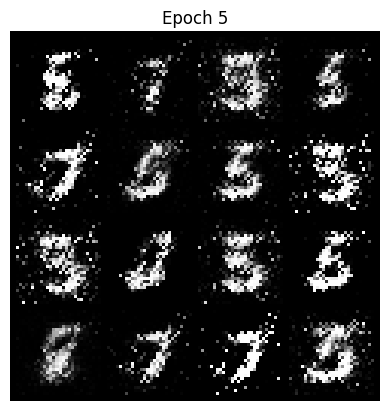

Epoch [6/50]  D Loss: 0.8174  G Loss: 1.4690


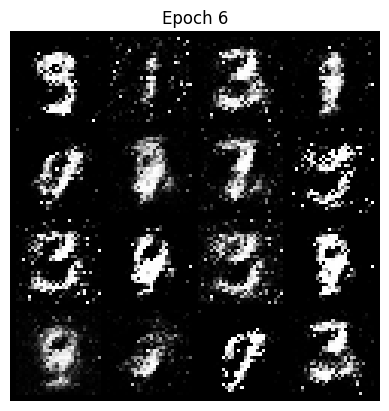

Epoch [7/50]  D Loss: 0.8357  G Loss: 2.1151


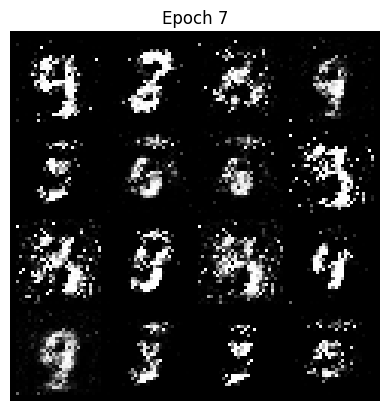

Epoch [8/50]  D Loss: 0.7658  G Loss: 2.1003


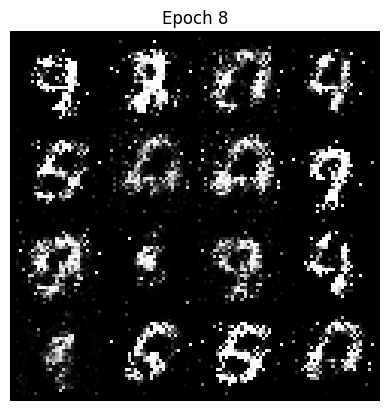

Epoch [9/50]  D Loss: 1.3331  G Loss: 0.7479


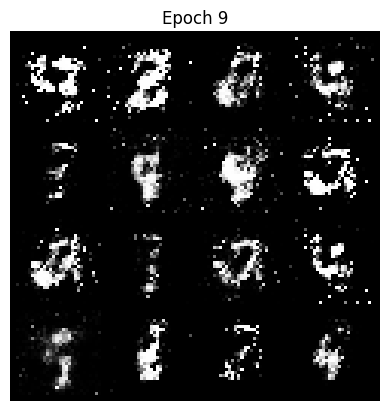

Epoch [10/50]  D Loss: 0.8245  G Loss: 1.7894


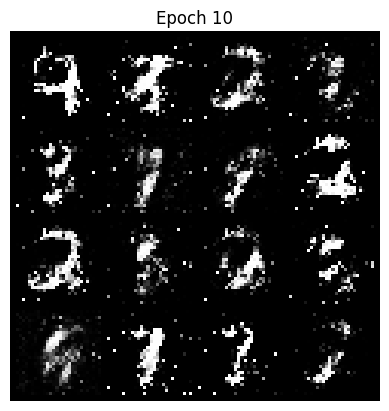

Epoch [11/50]  D Loss: 0.9403  G Loss: 0.7787


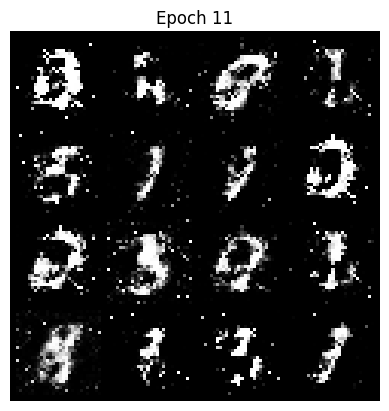

Epoch [12/50]  D Loss: 0.9965  G Loss: 0.9147


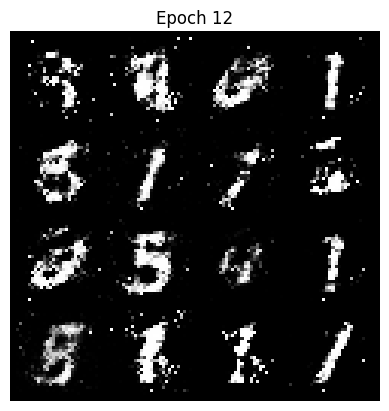

Epoch [13/50]  D Loss: 1.1343  G Loss: 1.3149


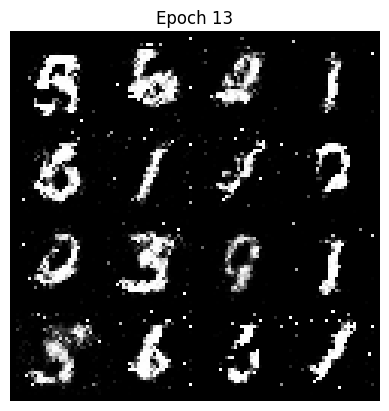

Epoch [14/50]  D Loss: 1.0008  G Loss: 1.9649


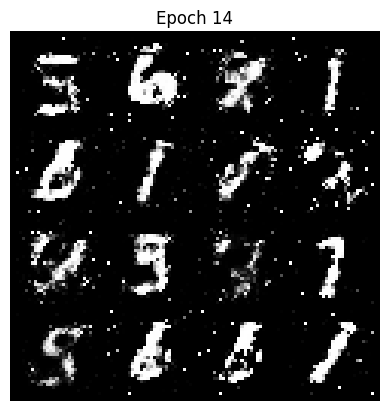

Epoch [15/50]  D Loss: 0.9619  G Loss: 1.4251


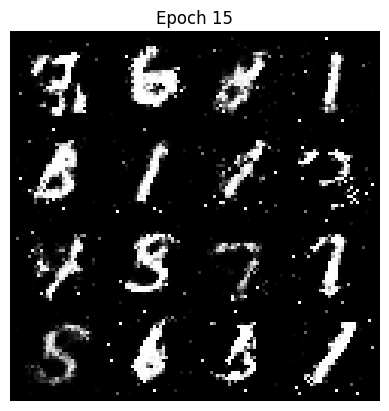

Epoch [16/50]  D Loss: 1.2394  G Loss: 0.7478


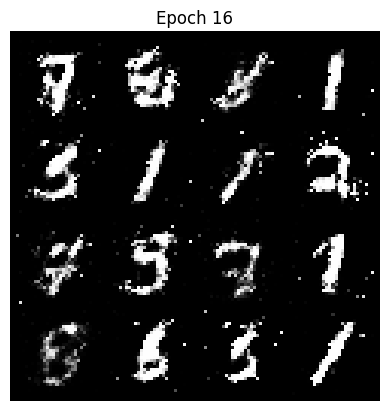

Epoch [17/50]  D Loss: 0.9733  G Loss: 1.1799


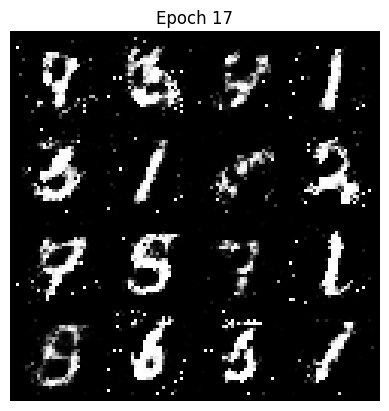

Epoch [18/50]  D Loss: 1.1803  G Loss: 0.7040


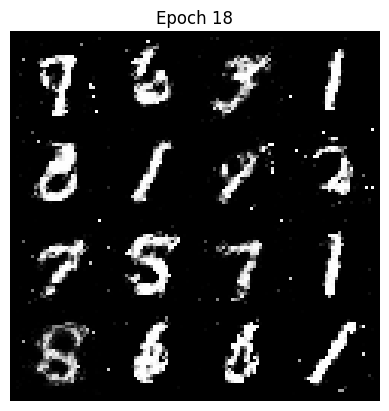

Epoch [19/50]  D Loss: 1.1436  G Loss: 1.3012


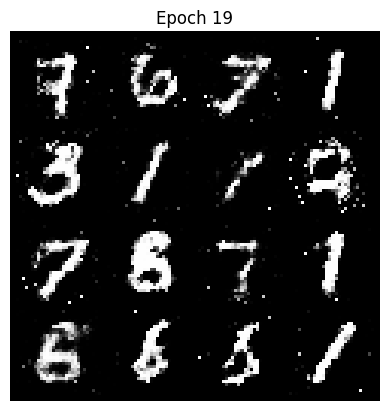

Epoch [20/50]  D Loss: 1.0922  G Loss: 0.9400


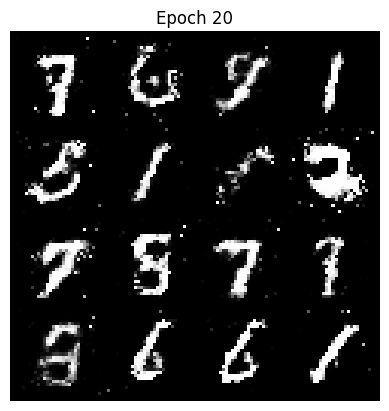

Epoch [21/50]  D Loss: 1.2679  G Loss: 1.8659


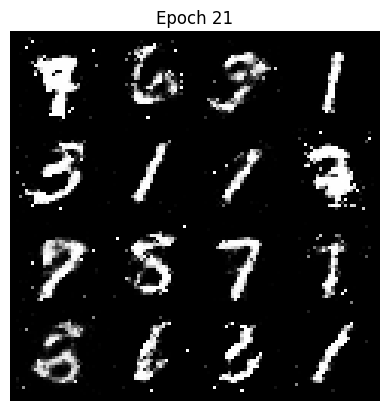

Epoch [22/50]  D Loss: 1.0966  G Loss: 1.2151


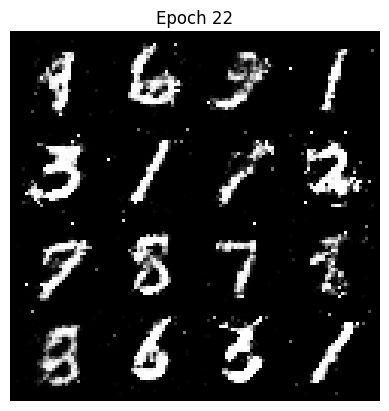

Epoch [23/50]  D Loss: 1.3089  G Loss: 1.7423


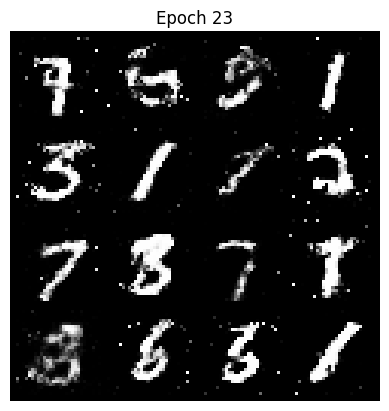

Epoch [24/50]  D Loss: 1.1348  G Loss: 0.7902


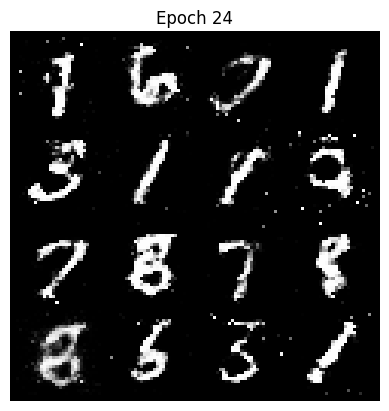

Epoch [25/50]  D Loss: 1.1790  G Loss: 1.3661


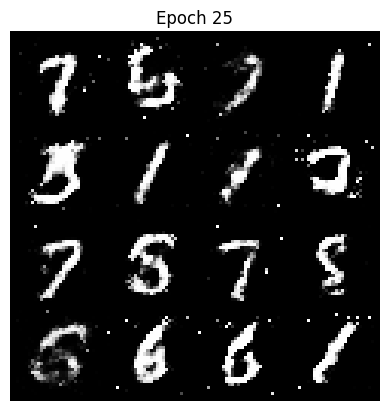

Epoch [26/50]  D Loss: 1.0373  G Loss: 0.9204


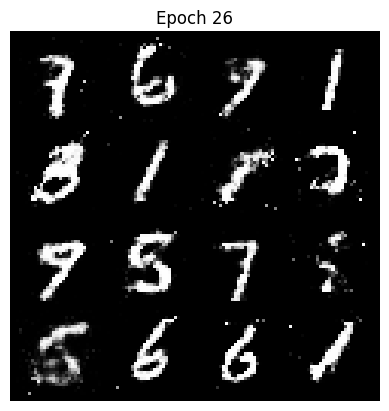

Epoch [27/50]  D Loss: 1.0517  G Loss: 0.7441


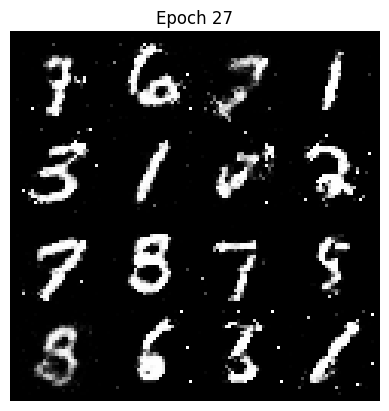

Epoch [28/50]  D Loss: 1.0468  G Loss: 1.2749


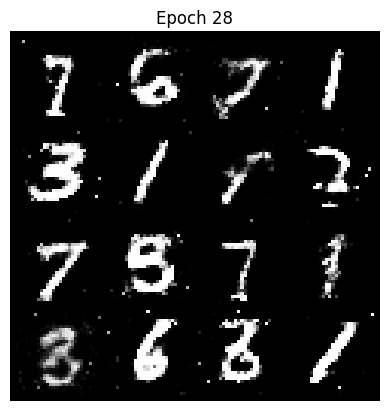

Epoch [29/50]  D Loss: 1.1774  G Loss: 1.0096


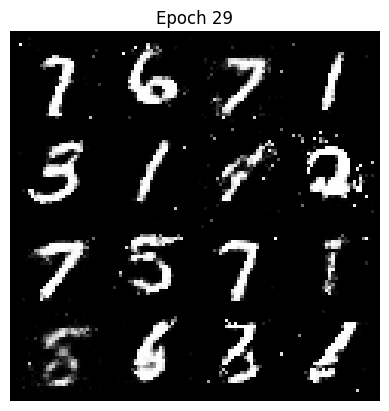

Epoch [30/50]  D Loss: 1.2108  G Loss: 1.3556


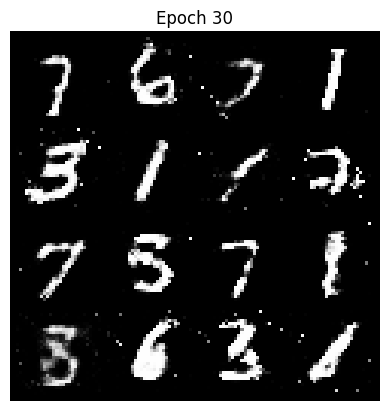

Epoch [31/50]  D Loss: 1.1194  G Loss: 0.6805


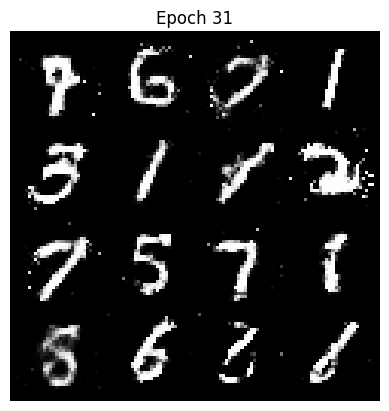

Epoch [32/50]  D Loss: 1.0603  G Loss: 0.7177


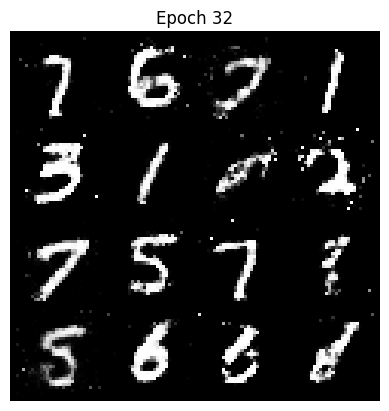

Epoch [33/50]  D Loss: 1.2093  G Loss: 1.1510


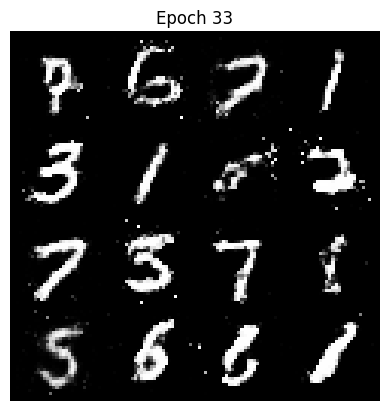

Epoch [34/50]  D Loss: 1.1519  G Loss: 1.1761


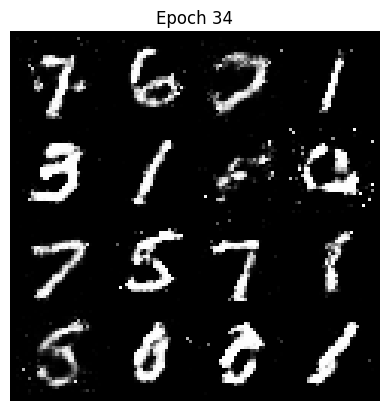

Epoch [35/50]  D Loss: 1.2448  G Loss: 1.6392


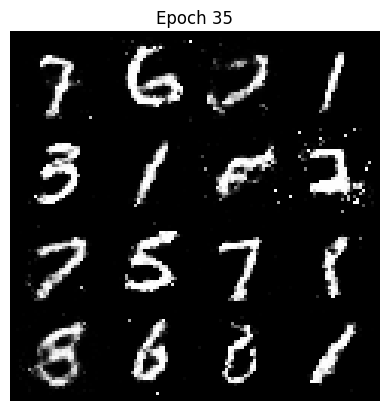

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
batch_size = 128
lr = 0.0002
z_dim = 100
num_epochs = 50
image_size = 28*28

# MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # Scale to [-1, 1]
])

dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Generator
class Generator(nn.Module):
    def __init__(self, z_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(z_dim, 256),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Linear(256, 512),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Linear(1024, image_size),
            nn.Tanh()  # Output in [-1, 1]
        )

    def forward(self, z):
        return self.model(z)

# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(image_size, 512),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        return self.model(img)

# Initialize models
generator = Generator(z_dim).to(device)
discriminator = Discriminator().to(device)

# Loss and optimizers
criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

# Fixed noise for generating samples
fixed_noise = torch.randn(16, z_dim).to(device)

# Training loop
for epoch in range(num_epochs):
    for i, (real_images, _) in enumerate(dataloader):
        batch_size_curr = real_images.size(0)

        # Prepare real and fake labels
        real_images = real_images.view(batch_size_curr, -1).to(device)
        real_labels = torch.ones(batch_size_curr, 1).to(device)
        fake_labels = torch.zeros(batch_size_curr, 1).to(device)

        # =========================
        #  Train Discriminator
        # =========================
        z = torch.randn(batch_size_curr, z_dim).to(device)
        fake_images = generator(z)

        real_loss = criterion(discriminator(real_images), real_labels)
        fake_loss = criterion(discriminator(fake_images.detach()), fake_labels)
        d_loss = real_loss + fake_loss

        optimizer_D.zero_grad()
        d_loss.backward()
        optimizer_D.step()

        # =========================
        #  Train Generator
        # =========================
        z = torch.randn(batch_size_curr, z_dim).to(device)
        generated_images = generator(z)
        g_loss = criterion(discriminator(generated_images), real_labels)

        optimizer_G.zero_grad()
        g_loss.backward()
        optimizer_G.step()

    # Show progress
    print(f"Epoch [{epoch+1}/{num_epochs}]  D Loss: {d_loss.item():.4f}  G Loss: {g_loss.item():.4f}")

    # Save or show samples
    with torch.no_grad():
        generated = generator(fixed_noise).reshape(-1, 1, 28, 28)
        generated = (generated + 1) / 2  # Rescale to [0,1]
        grid = torchvision.utils.make_grid(generated, nrow=4)
        npimg = grid.cpu().numpy()
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
        plt.axis('off')
        plt.title(f"Epoch {epoch+1}")
        plt.show()
